# PSTAF : Prediction System For Traffic Accident Fatalities
### by Sami Kalti

#### I- Importing libraries :

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

#### II- Reading Dataframe :

In [2]:
! unzip accident.zip

Archive:  accident.zip
replace accident.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
df = pd.read_csv('accident.csv', encoding = "ISO-8859-1")

#### III- Data Description :

In [4]:
# Showing the first 5 rows of the data
df.head()

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,COUNTY,COUNTYNAME,CITY,CITYNAME,DAY,DAYNAME,MONTH,MONTHNAME,YEAR,DAY_WEEK,DAY_WEEKNAME,HOUR,HOURNAME,MINUTE,MINUTENAME,NHS,NHSNAME,ROUTE,ROUTENAME,TWAY_ID,TWAY_ID2,RUR_URB,RUR_URBNAME,FUNC_SYS,FUNC_SYSNAME,RD_OWNER,RD_OWNERNAME,MILEPT,MILEPTNAME,LATITUDE,LATITUDENAME,LONGITUD,LONGITUDNAME,SP_JUR,SP_JURNAME,HARM_EV,HARM_EVNAME,MAN_COLL,MAN_COLLNAME,RELJCT1,RELJCT1NAME,RELJCT2,RELJCT2NAME,TYP_INT,TYP_INTNAME,WRK_ZONE,WRK_ZONENAME,REL_ROAD,REL_ROADNAME,LGT_COND,LGT_CONDNAME,WEATHER,WEATHERNAME,SCH_BUS,SCH_BUSNAME,RAIL,RAILNAME,NOT_HOUR,NOT_HOURNAME,NOT_MIN,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS,DRUNK_DR
0,1,Alabama,10001,1,1,0,0,4,4,0,51,ELMORE (51),0,NOT APPLICABLE,1,1,1,January,2020,4,Wednesday,2,2:00am-2:59am,58,58,0,This section IS NOT on the NHS,4,County Road,cr-4,NaN,1,Rural,5,Major Collector,2,County Highway Agency,0,NaN,32.433133,32.43313333,-86.094850,-86.09485,0,No Special Jurisdiction,42,Tree (Standing Only),0,The First Harmful Event was Not a Collision wi...,0,No,1,Non-Junction,1,Not an Intersection,0,NaN,4,On Roadside,2,Dark - Not Lighted,1,Clear,0,No,0,Not Applicable,99,Unknown,99,Unknown,3,3:00am-3:59am,10,10,99,Unknown,99,Unknown EMS Hospital Arrival Time,3,1
1,1,Alabama,10002,4,4,0,0,6,6,0,73,JEFFERSON (73),350,BIRMINGHAM,2,2,1,January,2020,5,Thursday,17,5:00pm-5:59pm,18,18,0,This section IS NOT on the NHS,6,Local Street - Municipality,martin luther king jr dr,NaN,2,Urban,4,Minor Arterial,4,City or Municipal Highway Agency,0,NaN,33.484658,33.48465833,-86.839544,-86.83954444,0,No Special Jurisdiction,12,Motor Vehicle In-Transport,6,Angle,0,No,1,Non-Junction,1,Not an Intersection,0,NaN,1,On Roadway,3,Dark - Lighted,2,Rain,0,No,0,Not Applicable,17,5:00pm-5:59pm,18,18,17,5:00pm-5:59pm,26,26,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
2,1,Alabama,10003,2,2,0,0,2,2,0,117,SHELBY (117),0,NOT APPLICABLE,2,2,1,January,2020,5,Thursday,14,2:00pm-2:59pm,55,55,0,This section IS NOT on the NHS,3,State Highway,sr-76,us-280,1,Rural,4,Minor Arterial,1,State Highway Agency,49,49,33.299942,33.29994167,-86.369642,-86.36964167,0,No Special Jurisdiction,34,Ditch,0,The First Harmful Event was Not a Collision wi...,0,No,3,Intersection-Related,3,T-Intersection,0,NaN,4,On Roadside,1,Daylight,2,Rain,0,No,0,Not Applicable,14,2:00pm-2:59pm,58,58,15,3:00pm-3:59pm,15,15,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
3,1,Alabama,10004,1,1,0,0,5,5,0,15,CALHOUN (15),0,NOT APPLICABLE,3,3,1,January,2020,6,Friday,15,3:00pm-3:59pm,20,20,0,This section IS NOT on the NHS,4,County Road,CR-ALEXANDRIA WELLINGTON RD,NaN,1,Rural,7,Local,2,County Highway Agency,0,NaN,33.795072,33.79507222,-85.883486,-85.88348611,0,No Special Jurisdiction,42,Tree (Standing Only),0,The First Harmful Event was Not a Collision wi...,0,No,1,Non-Junction,1,Not an Intersection,0,NaN,4,On Roadside,1,Daylight,10,Cloudy,0,No,0,Not Applicable,99,Unknown,99,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
4,1,Alabama,10005,1,1,0,0,1,1,0,37,COOSA (37),0,NOT APPLICABLE,4,4,1,January,2020,7,Saturday,0,0:00am-0:59am,45,45,0,This section IS NOT on the NHS,4,County Road,CR-63,NaN,1,Rural,5,Major Collector,2,County Highway Agency,0,NaN,32.848414,32.84841389,-86.083547,-86.08354722,0,No Special Jurisdiction,42,Tree (Standing Only),0,The First Harmful Event was Not a Collision wi...,0,No,1,Non-Junction,1,Not an Intersection,0,NaN,4,On Roadside,2,Dark - Not Lighted,2,Rain,0,No,0,Not Applicable,0,0:00am-0:59am,45,45,0,0:00am-0:59am,55,55,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0


In [5]:
# Showing all columns and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35766 entries, 0 to 35765
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         35766 non-null  int64  
 1   STATENAME     35766 non-null  object 
 2   ST_CASE       35766 non-null  int64  
 3   VE_TOTAL      35766 non-null  int64  
 4   VE_FORMS      35766 non-null  int64  
 5   PVH_INVL      35766 non-null  int64  
 6   PEDS          35766 non-null  int64  
 7   PERSONS       35766 non-null  int64  
 8   PERMVIT       35766 non-null  int64  
 9   PERNOTMVIT    35766 non-null  int64  
 10  COUNTY        35766 non-null  int64  
 11  COUNTYNAME    35766 non-null  object 
 12  CITY          35766 non-null  int64  
 13  CITYNAME      35766 non-null  object 
 14  DAY           35766 non-null  int64  
 15  DAYNAME       35766 non-null  int64  
 16  MONTH         35766 non-null  int64  
 17  MONTHNAME     35766 non-null  object 
 18  YEAR          35766 non-nu

In [6]:
df = df.select_dtypes(include=['number'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35766 entries, 0 to 35765
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATE       35766 non-null  int64  
 1   ST_CASE     35766 non-null  int64  
 2   VE_TOTAL    35766 non-null  int64  
 3   VE_FORMS    35766 non-null  int64  
 4   PVH_INVL    35766 non-null  int64  
 5   PEDS        35766 non-null  int64  
 6   PERSONS     35766 non-null  int64  
 7   PERMVIT     35766 non-null  int64  
 8   PERNOTMVIT  35766 non-null  int64  
 9   COUNTY      35766 non-null  int64  
 10  CITY        35766 non-null  int64  
 11  DAY         35766 non-null  int64  
 12  DAYNAME     35766 non-null  int64  
 13  MONTH       35766 non-null  int64  
 14  YEAR        35766 non-null  int64  
 15  DAY_WEEK    35766 non-null  int64  
 16  HOUR        35766 non-null  int64  
 17  MINUTE      35766 non-null  int64  
 18  NHS         35766 non-null  int64  
 19  ROUTE       35766 non-nul

#### IV- Data Processing and Vizualisation :

In [8]:
# I decapitalized all columns' titles to make it easier to manipulate the data
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

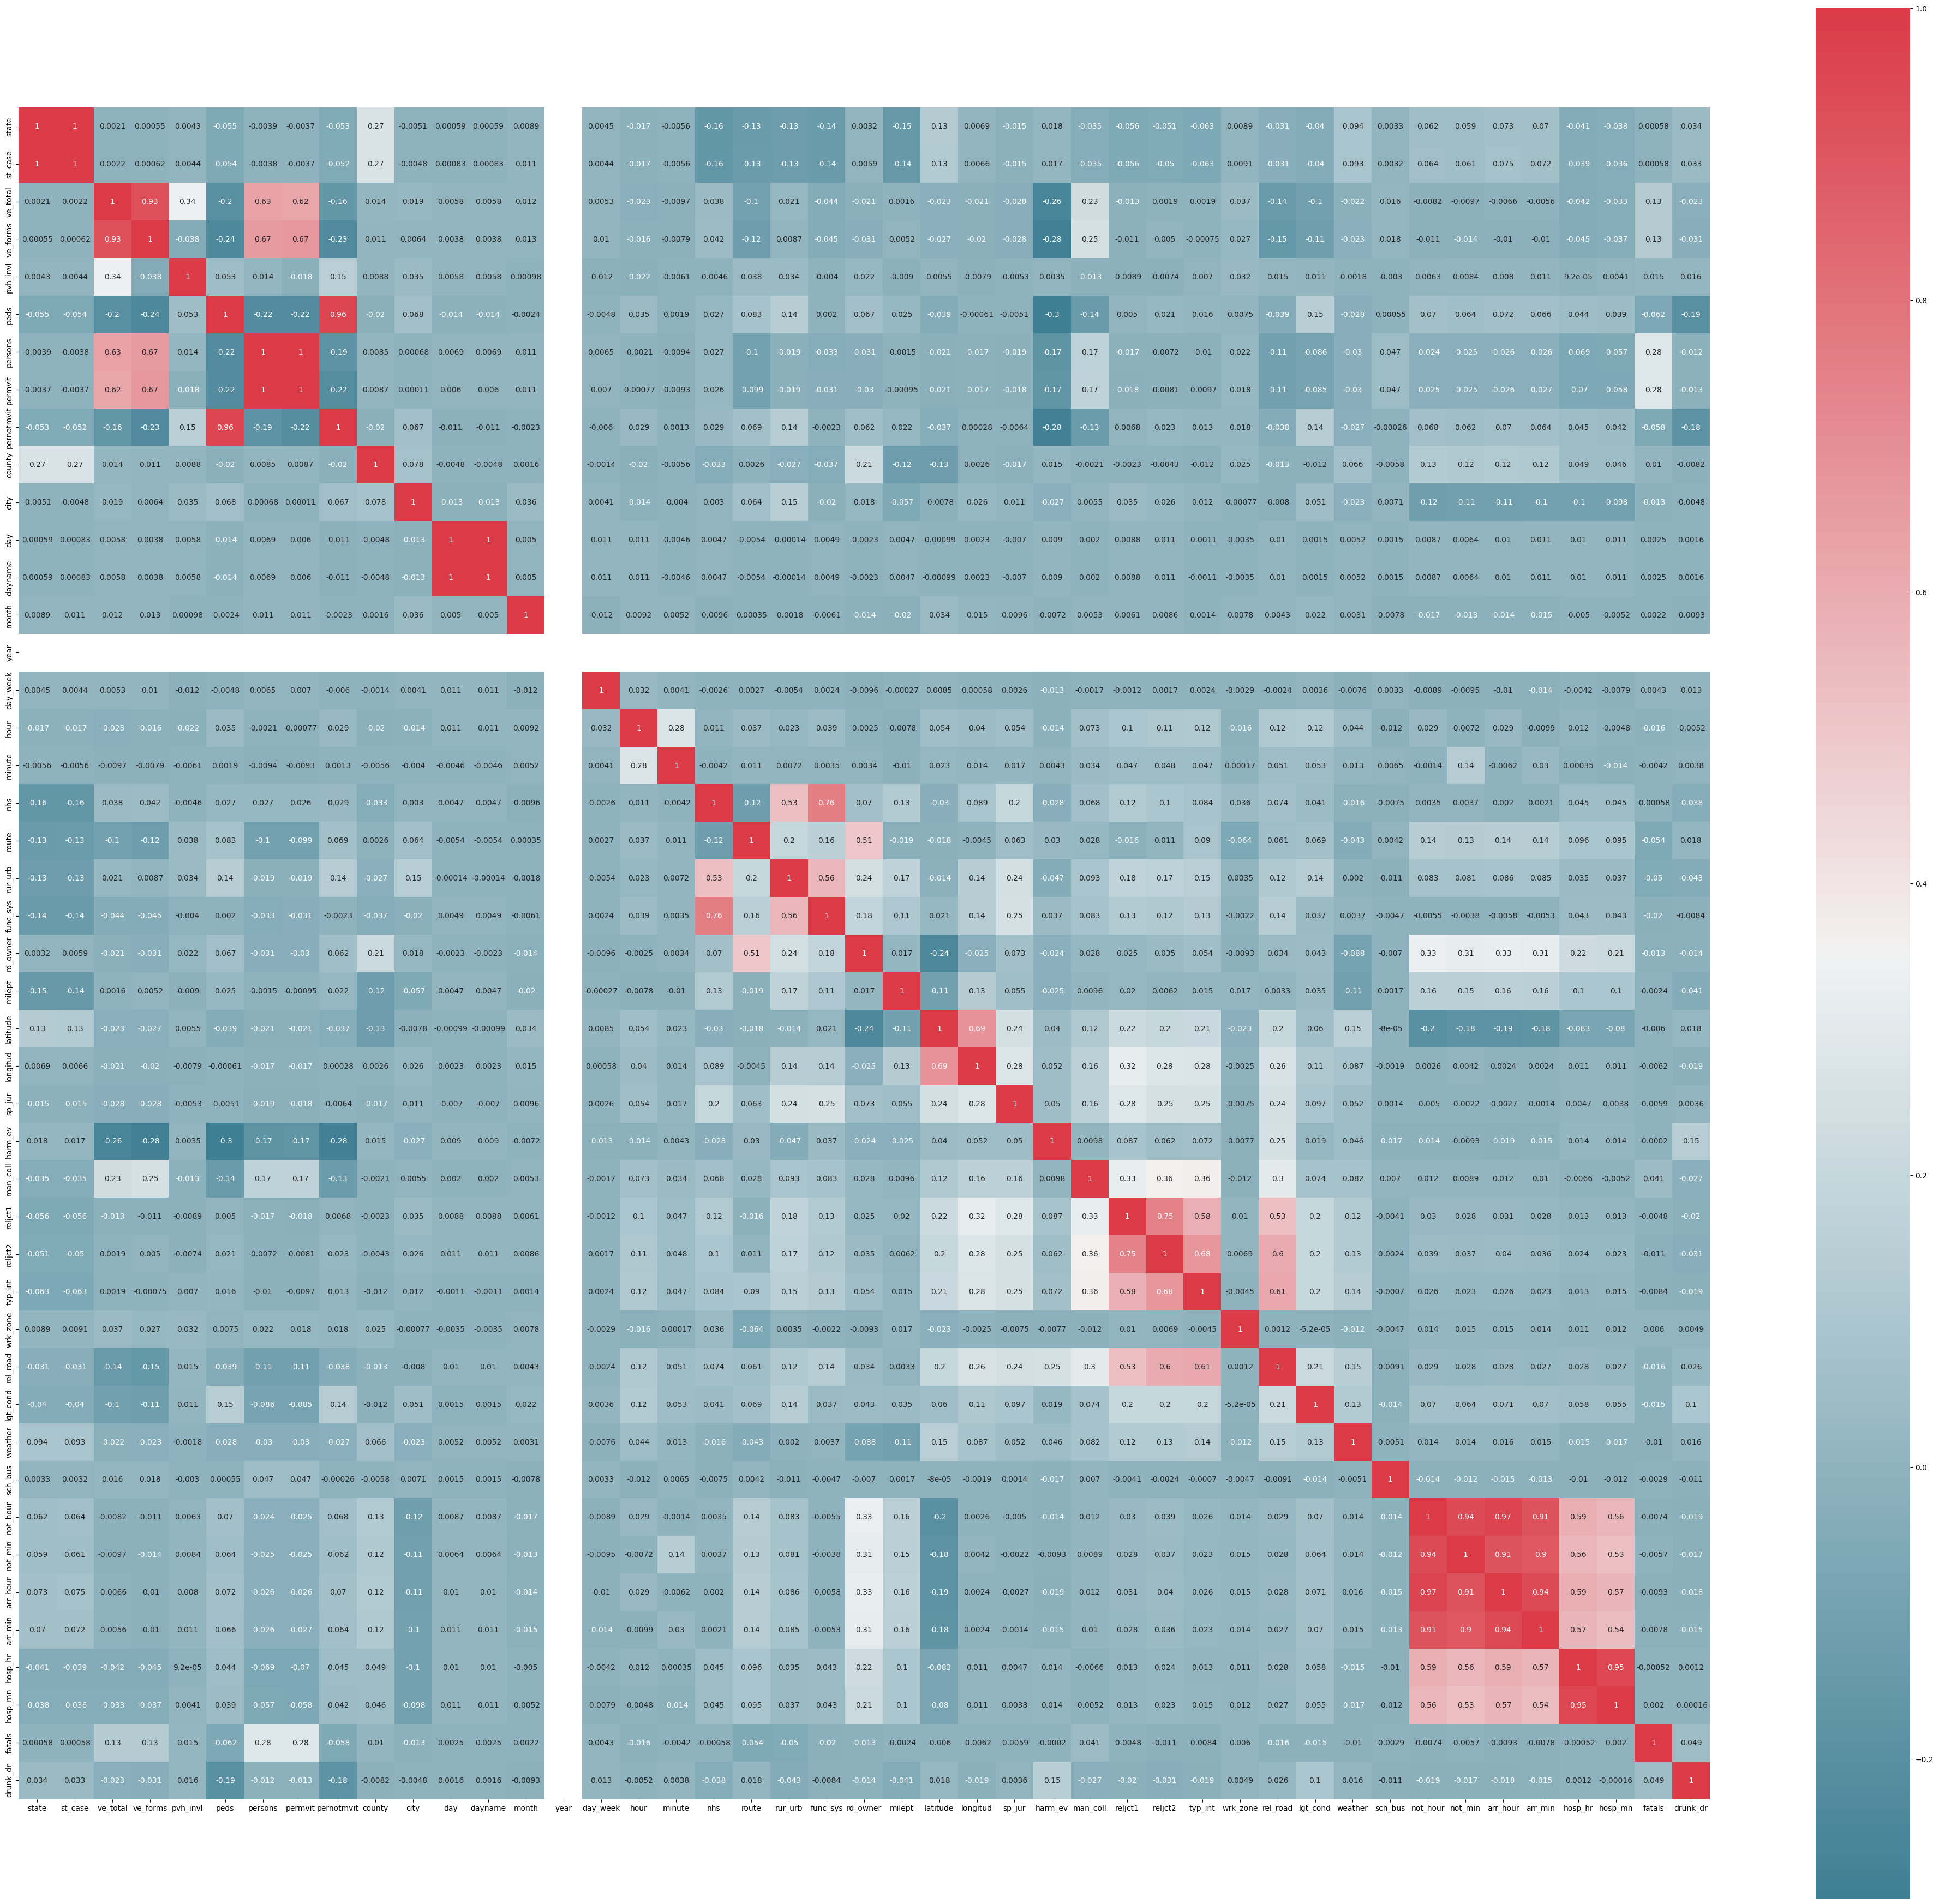

In [9]:
# I did this correlation between features to know important relations between the feature "fatals" and
# to manipulate the data
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 50 , 50 ) )
    cmap = sns.diverging_palette(220 , 10 , as_cmap = True)
    s = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' :10})
plot_correlation_map( df)

These are 11 features that I selected based on the correlation map :

state : state number
ve_total : number of vehicle forms submitted
ve_forms : number of motor vehicles in transport
peds : number of forms submitted for persons not in motor vehicles
persons : number of forms submitted for persons in motor vehicles
county : county
city : city
nhs : whether it is national highway system
latitude  : geographical location of crash 1
longitud  : geographical location of crash 2
drunk_dr  : drunk driver/drink & drive

This is the output that i'm going to predict :

fatals  : number of possible deaths by crash

In [10]:
# Dropping all intruder columns that I don't need in my predictions
df=df.drop(columns=['st_case','pvh_invl','day','month','year','hour','minute','rur_urb','rd_owner',
                    'route','milept','sp_jur','harm_ev','man_coll','reljct1','reljct2',
                    'typ_int','wrk_zone','rel_road','lgt_cond','sch_bus','not_hour','not_min','arr_hour',
                    'arr_min','hosp_hr','hosp_mn','weather','pernotmvit','permvit','func_sys', 'dayname'])

In [11]:
# Showing the first 5 rows of the clean data
df.head()

,state,ve_total,ve_forms,peds,persons,county,city,day_week,nhs,latitude,longitud,fatals,drunk_dr
0,1,1,1,0,4,51,0,4,0,32.433133,-86.094850,3,1
1,1,4,4,0,6,73,350,5,0,33.484658,-86.839544,1,0
2,1,2,2,0,2,117,0,5,0,33.299942,-86.369642,1,0
3,1,1,1,0,5,15,0,6,0,33.795072,-85.883486,1,0
4,1,1,1,0,1,37,0,7,0,32.848414,-86.083547,1,0


In [12]:
# Making sure that all data is numerical
df.dtypes

,0
state,int64
ve_total,int64
ve_forms,int64
peds,int64
persons,int64
county,int64
city,int64
day_week,int64
nhs,int64
latitude,float64


#### IV- Modeling :

In [13]:
# Defining the input and output data
X=df.loc[:, df.columns != 'fatals']
y=df['fatals']
# Applying the 'train_test_split' function to split the data randomly to training data and testing data
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=40)

In [14]:
# Showing the size of each of the whole data, training data and testing data
df.shape ,X_train.shape ,y_train.shape ,X_test.shape , y_test.shape

((35766, 13), (25036, 12), (25036,), (10730, 12), (10730,))

In [15]:
# Training the model using Logistic Regression algorithm
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)
pred= model.predict(X_test)

In [16]:
# Printing some error metrics to evaluate the model
print("MSE:",metrics.mean_squared_error(y_test,pred))
print("R squared :" ,abs(metrics.r2_score(y_test,pred)))

MSE: 0.13345759552656106
R squared : 0.059646383631967836


In [17]:
# Printing the model's accuracy to know its performance
print("Accuracy :",round(accuracy_score(y_test, pred)*100,2),"%")

Accuracy : 92.99 %


#### IV- Demonstration :

In [18]:
# Creating an empty dataframe to fill it with some data to test our model
df_test = pd.DataFrame(data=None, columns=X_test.columns, index=None)
df_test

,state,ve_total,ve_forms,peds,persons,county,city,day_week,nhs,latitude,longitud,drunk_dr


In [19]:
# I filled some random values to see what will be the resulting output
df_test = pd.concat([df_test, pd.DataFrame([{'state':36, 've_total':9, 've_forms':6, 'peds':1,'persons':8, 'county':61,
                          'city':4170, 'day_week':3, 'nhs':9,'latitude':40.707966,'longitud':-74.007736,
                          'drunk_dr':0}])], ignore_index=True)
df_test

,state,ve_total,ve_forms,peds,persons,county,city,day_week,nhs,latitude,longitud,drunk_dr
0,36,9,6,1,8,61,4170,3,9,40.707966,-74.007736,0


In [20]:
# Testing the prediction model on this input and getting the output
predicted= model.predict(df_test)
print(predicted,'person is in fatal danger.')

[1] person is in fatal danger.
